In [10]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [41]:
df= pd.read_csv("german_credit.csv")
df.shape

(1000, 21)

In [42]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [43]:
X = df.drop(columns="default")

In [44]:
Y= df['default']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.5,random_state=42)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [46]:
# Print Shape of model data
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [47]:
df_credit = pd.get_dummies(df, columns= categorical_columns, dummy_na= False, drop_first=True)
df_credit.shape

(1000, 49)

In [48]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

### Check for highly correlated variables but don't required any treatment for this use case

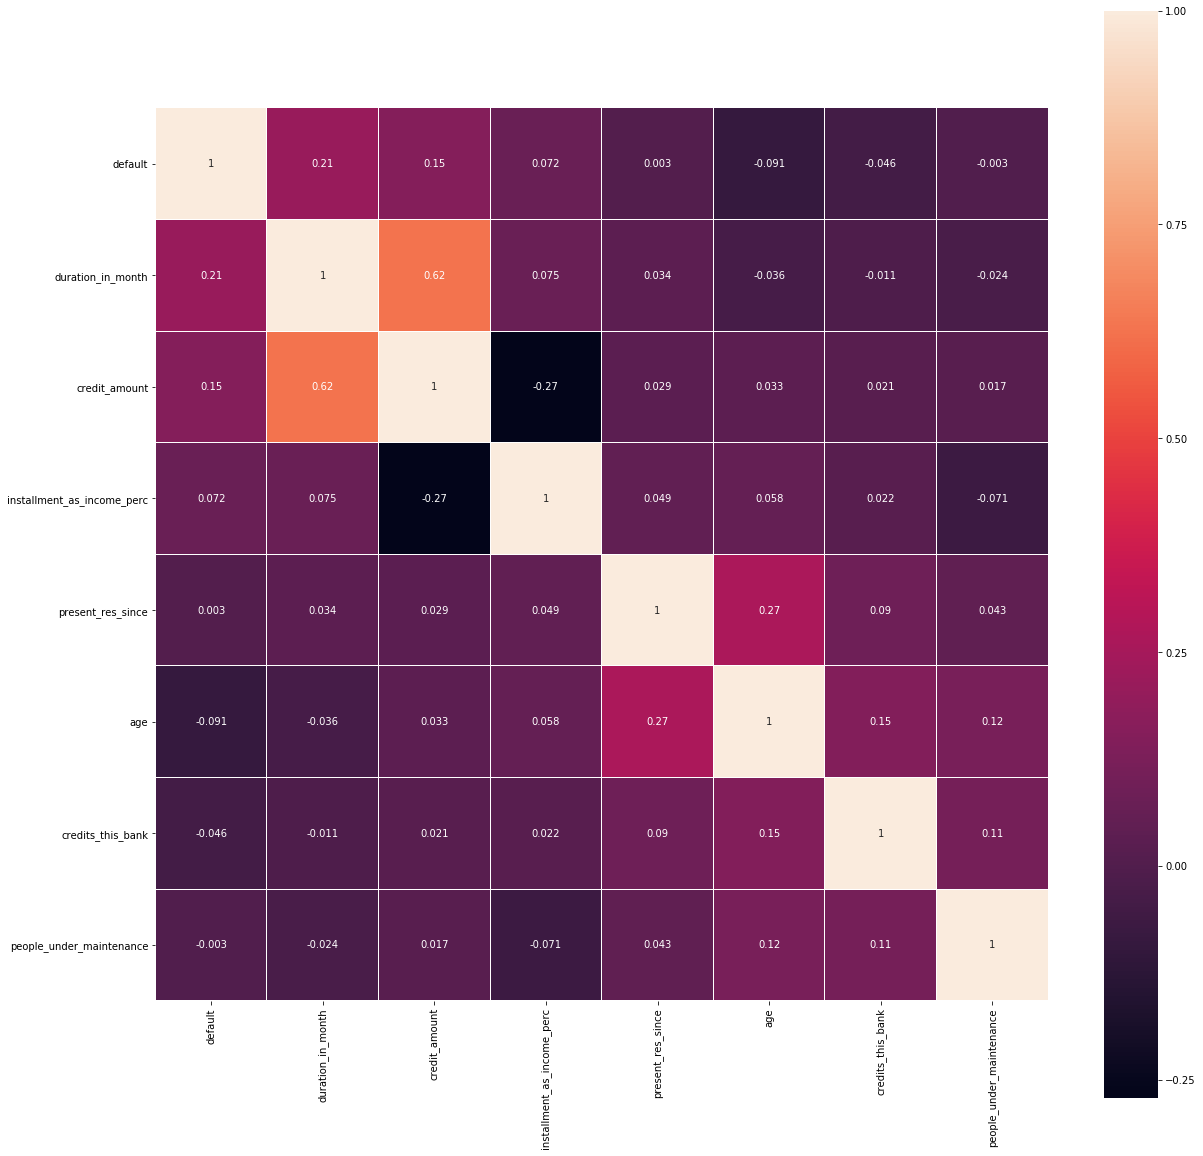

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### Drop the original variables which are converted to dummy

In [51]:
df_credit.sample(4)

default  duration_in_month  credit_amount  installment_as_income_perc  \
423        0                 21           1591                           4   
823        0                  8            731                           4   
860        0                 24           5804                           4   
97         0                 18           2622                           4   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
423                  3   34                  2                         1   
823                  4   47                  2                         1   
860                  2   27                  2                         1   
97                   4   34                  1                         1   

     account_check_status_< 0 DM  \
423                            0   
823                            1   
860                            0   
97                             0   

     account_check_status_>= 200 DM / salary assignments for at least 1 year  \
423                                                  0                         
823                                                  0                         
860                                                  0                         
97                                                   0                         

     ...  property_unknown / no property  other_installment_plans_none  \
423  ...                               0                             1   
823  ...                               0                             1   
860  ...                               0                             1   
97   ...                               0                             1   

     other_installment_plans_stores  housing_own  housing_rent  \
423                               0            1             0   
823                               0            1             0   
860                               0            1             0   
97                                0            1             0   

     job_skilled employee / official  \
423                                0   
823                                0   
860                                1   
97                                 1   

     job_unemployed/ unskilled - non-resident  job_unskilled - resident  \
423                                         0                         0   
823                                         0                         1   
860                                         0                         0   
97                                          0                         0   

     telephone_yes, registered under the customers name   foreign_worker_yes  
423                                                  0                     1  
823                                                  0                     1  
860                                                  0                     1  
97                                                   0                     1  

[4 rows x 49 columns]

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [53]:
sns.countplot(x="default",data=df_credit)

In [54]:
X= df_credit.drop(columns='default')

In [55]:
y=df_credit['default']

In [57]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None,n_jobs=2, max_features=10, n_estimators=500, random_state=9999)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [68]:
#Testing the model 
#Predicting using our  model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7666666666666667


[[196  13]
 [ 57  34]]


0.41362530413625304


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [69]:
#Testing the model 
#Predicting using our  model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7666666666666667


[[196  13]
 [ 57  34]]


0.41362530413625304


### Q6 Show the list of the features importance( 1 Marks)

In [71]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
credit_amount                                         0.125559
age                                                   0.100368
duration_in_month                                     0.090506
account_check_status_no checking account              0.056662
installment_as_income_perc                            0.038516
account_check_status_< 0 DM                           0.037101
present_res_since                                     0.036940
credit_history_critical account/ other credits ...    0.029797
purpose_car (new)                                     0.023903
savings_... < 100 DM                                  0.020189
credits_this_bank                                     0.020117
telephone_yes, registered under the customers n...    0.018765
other_installment_plans_none                          0.018568
personal_status_sex_male : single                     0.018522
property_real estate                                  0.017176
property_if not A121/A122 : car or other, not i...    0.017115
housing_own                                           0.017001
present_emp_since_1 <= ... < 4 years                  0.016428
credit_history_existing credits paid back duly ...    0.016184
job_skilled employee / official                       0.015740
present_emp_since_... < 1 year                        0.015591
purpose_domestic appliances                           0.015433
credit_history_no credits taken/ all credits pa...    0.015272
property_unknown / no property                        0.015219
purpose_radio/television                              0.015185
savings_unknown/ no savings account                   0.014512
present_emp_since_unemployed                          0.013644
job_unskilled - resident                              0.012237
present_emp_since_4 <= ... < 7 years                  0.011839
other_debtors_none                                    0.011494
purpose_business                                      0.011493
housing_rent                                          0.010420
people_under_maintenance                              0.010226
credit_history_delay in paying off in the past        0.009642
purpose_car (used)                                    0.009138
account_check_status_>= 200 DM / salary assignm...    0.009122
savings_100 <= ... < 500 DM                           0.009021
personal_status_sex_male : married/widowed            0.008940
other_debtors_guarantor                               0.008067
personal_status_sex_male : divorced/separated         0.007150
savings_500 <= ... < 1000 DM                          0.007045
other_installment_plans_stores                        0.005989
purpose_education                                     0.004896
foreign_worker_yes                                    0.003789
job_unemployed/ unskilled - non-resident              0.002998
purpose_furniture/equipment                           0.002744
purpose_repairs                                       0.002627
purpose_retraining                                    0.001112

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:
# Use below values
num_folds = 10
seed = 77

In [74]:
#Validate the Random Forest model build above using k fold

In [78]:
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344

In [79]:
#However scores can be directly calculated using cross_val_score
score = cross_val_score(rf, X, y, cv=10)


In [0]:
#Calculate Mean score

In [81]:
Mean_score = score.mean()
Mean_score

0.7649999999999999

In [0]:
# Calculate score standard deviation using std()

In [82]:
score_std = score.std()
score_std

0.03721558813185679

# Q8 Print the confusion matrix( 1 Marks)

In [91]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
y_pred = cross_val_predict(rf, X, y, cv=10)
confusion = confusion_matrix(y, y_pred)


In [92]:
confusion

array([[642,  58],
       [177, 123]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [93]:
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [94]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y, y_pred))

0.41
0.41


In [96]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y, y_pred))

0.6795580110497238
0.6795580110497238


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [100]:
auc= metrics.roc_auc_score(y, y_pred)

In [101]:
auc

0.6635714285714285

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [102]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [103]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'rfm' is not defined

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
